In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img =cv2.imread("blackBG.jpg")

In [3]:
# grayscale 
# https://docs.opencv.org/4.5.0/d7/d4d/tutorial_py_thresholding.html
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,bin_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

(-0.5, 972.5, 917.5, -0.5)

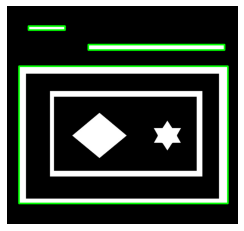

In [4]:
# RETR_EXTERNAL:仅外圈轮廓
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img,contours,-1,(0,255,0),5)
plt.imshow(img[...,::-1])
plt.axis('off')

In [5]:
# RetrievalModes:https://docs.opencv.org/4.5.0/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71
#ContourApproximationModes:https://docs.opencv.org/4.5.0/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

(-0.5, 972.5, 917.5, -0.5)

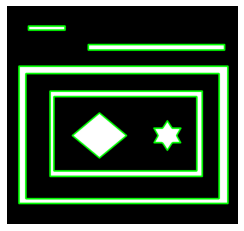

In [6]:
cv2.drawContours(img,contours,-1,(0,255,0),5)
plt.imshow(img[...,::-1])
plt.axis('off')